<a href="https://colab.research.google.com/github/Himanshu-Singh11/Colab/blob/main/Titanic%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Titanic Dataset...

Dataset Loaded Successfully!

 First 5 Rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



 Data Overview:
----------------------------------------
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



 Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Data Cleaning Complete!
 Remaining Columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
 Current Shape: (891, 9)

 Cleaned Data Preview:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True



 Starting Exploratory Data Analysis...



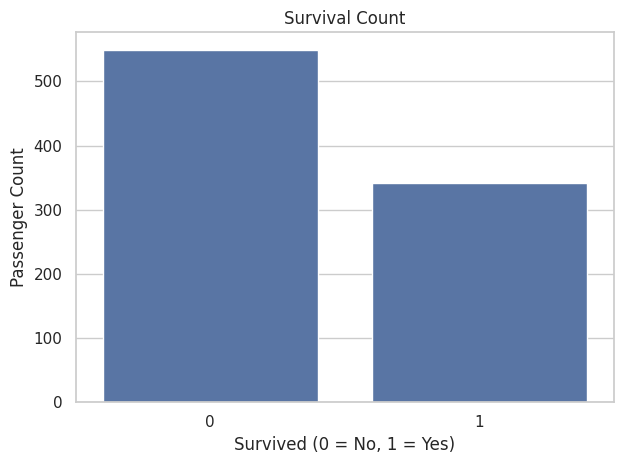

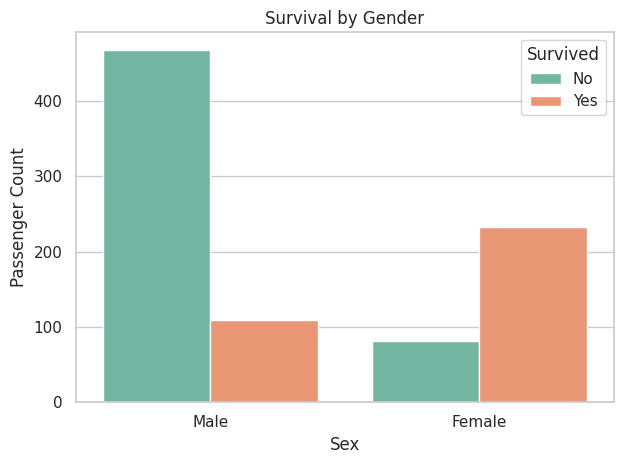

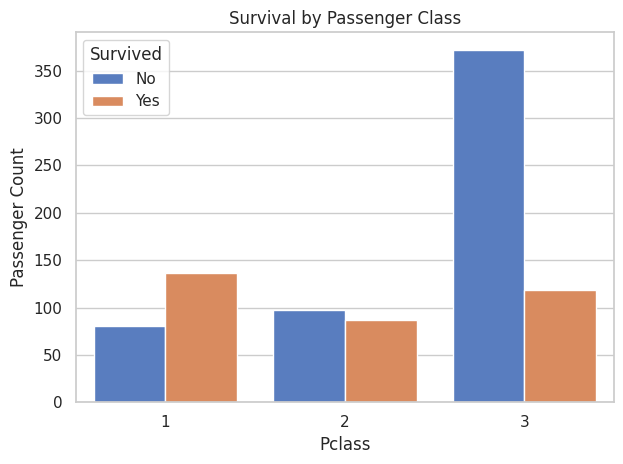

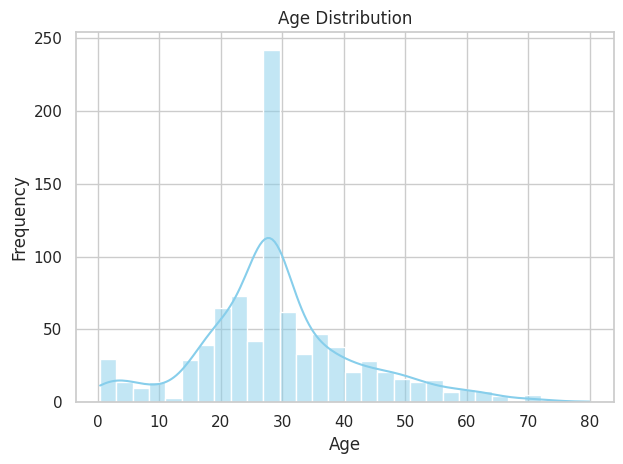

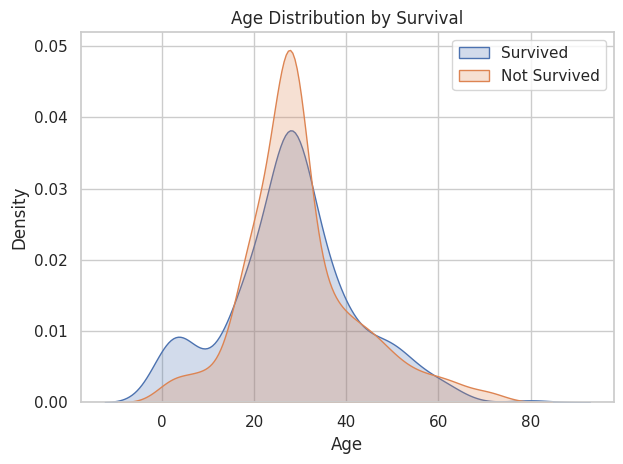

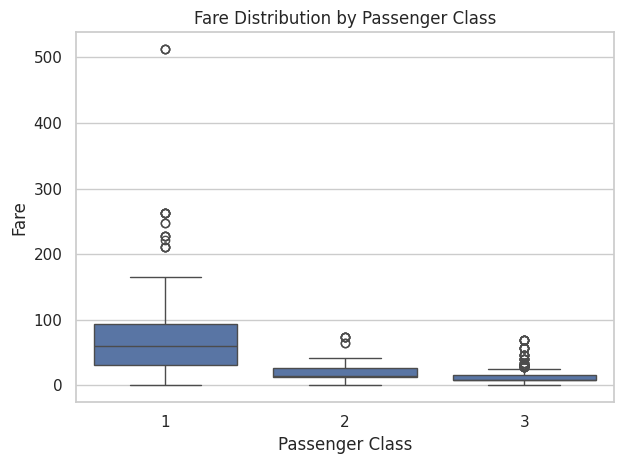

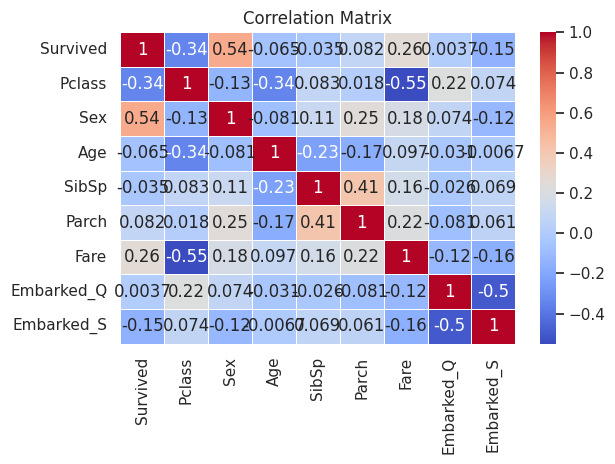




 Exploratory Data Analysis Complete!

 Key Insights:

• Female passengers had a significantly higher survival rate than males.
• 1st class passengers had the highest chance of survival.
• Children and younger passengers survived at higher rates.
• Passengers who paid higher fares were more likely from 1st class and had better survival rates.
• Most passengers embarked from Southampton, but those from Cherbourg had higher survival chances.

 -> Dataset Ready for Modeling or Further Analysis!


In [5]:
#  Titanic Dataset


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")



print("Loading Titanic Dataset...\n")
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Dataset Loaded Successfully!\n")
print(" First 5 Rows:")
display(df.head())

print("\n Data Overview:")
print("-" * 40)
print("Data Info:")
print(df.info())

print("\n Summary Statistics:")
display(df.describe())

print("\n Missing Values:")
print(df.isnull().sum())

df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("\n Data Cleaning Complete!")
print(" Remaining Columns:", list(df.columns))
print(" Current Shape:", df.shape)
print("\n Cleaned Data Preview:")
display(df.head())

print("\n Starting Exploratory Data Analysis...\n")

#Grap-1
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()
print("\n")

#Grap-2
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title('Survival by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()
print("\n")

#Grap-3
sns.countplot(x='Pclass', hue='Survived', data=df, palette='muted')
plt.title('Survival by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()
print("\n")

#Grap-4
sns.histplot(x='Age', data=df, kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("\n")

#Grap-5
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.legend()
plt.tight_layout()
plt.show()
print("\n")

#Grap-6
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()
print("\n")

#Grap-7
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
print("\n")

# Pairplot Overview (Optional)
# sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived', palette='husl')
# plt.suptitle("Pairwise Relationships", y=0.80)
# plt.show()


print("\n Exploratory Data Analysis Complete!\n")
print(" Key Insights:")
print("""
• Female passengers had a significantly higher survival rate than males.
• 1st class passengers had the highest chance of survival.
• Children and younger passengers survived at higher rates.
• Passengers who paid higher fares were more likely from 1st class and had better survival rates.
• Most passengers embarked from Southampton, but those from Cherbourg had higher survival chances.
""")
print(" -> Dataset Ready for Modeling or Further Analysis!")